# Run the whole deltas algorithm

In [229]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

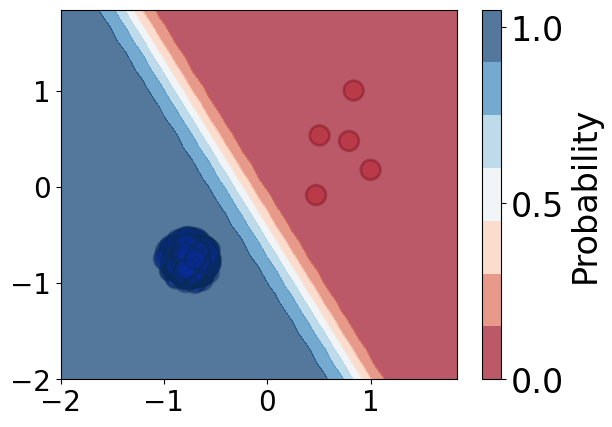

In [230]:
N1 = 10000
N2 = 5
model = 'SVM'
model = 'Linear'
balance_clf = True

data_clf = pipeline.get_data_and_classifier(
    model=model,
    m1=[-10, -10],
    m2=[10, 10],
    cov1=[[1, 0], [0, 1]],
    cov2=[[20, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True,
    balance_clf=balance_clf)

if model == 'SVM':
    print('support vectors:', data_clf['clf'].support_vectors_)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.22901070845954008
R2 empirical: 0.46832576363972467


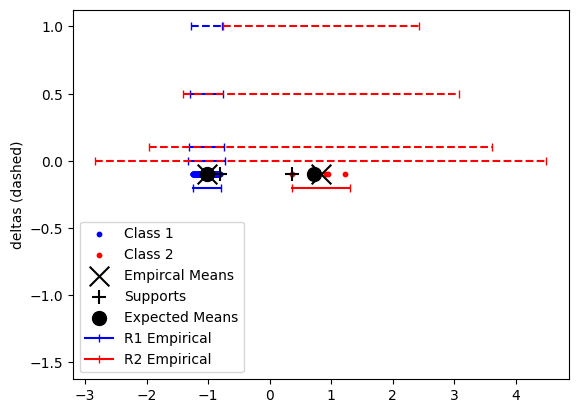

In [231]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [232]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline.print_params(data_info)

Parameters
        R:  1.2505330885172838
        N1: 10000
        N2: 10000
        R1: 0.22901070845954008
        R2: 0.46832576363972467
        M:  1.1768006576589891
        D:  1.8558868815497576
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.9996389822867899]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.485485485485486 
    delta2: 0.9999999999664853
    constraint satisfied: False


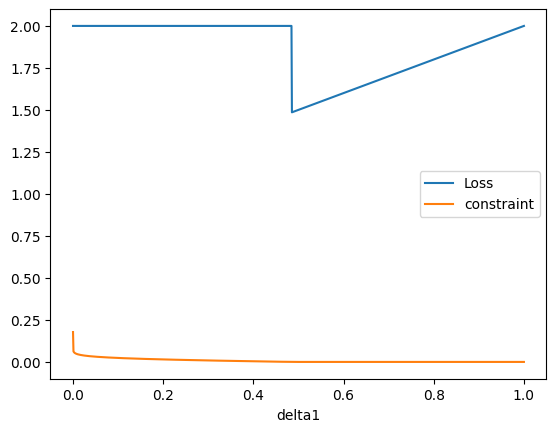

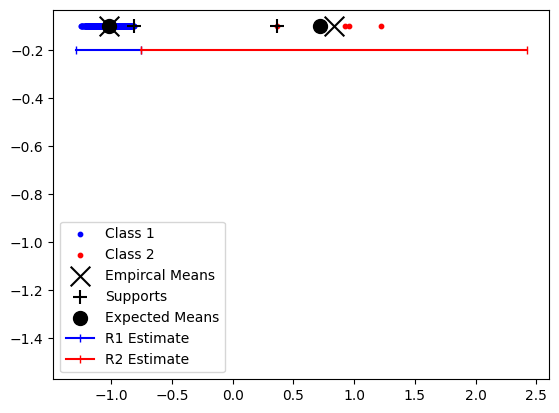

In [233]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # lweights
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

original accuracy: 0.9997
deltas   accuracy: 0.99975


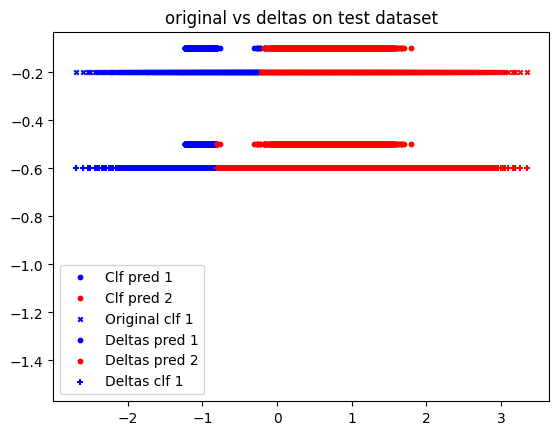

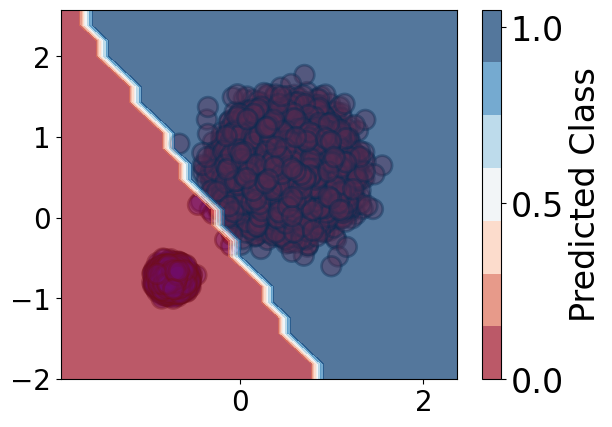

In [234]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)